<a href="https://colab.research.google.com/github/AlvimDePaula/grupo_assinante_universidadesdedados/blob/main/Analise_Olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook criado com intenção de fazer uma análise exploratória em cima do conjunto de dados fornecido pela Olist e se é possível a classificação dos clientes através do algoritmo KMeans no final. (https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Folistbr%2Fbrazilian-ecommerce%3Fselect%3Dolist_orders_dataset.csv)

Schema

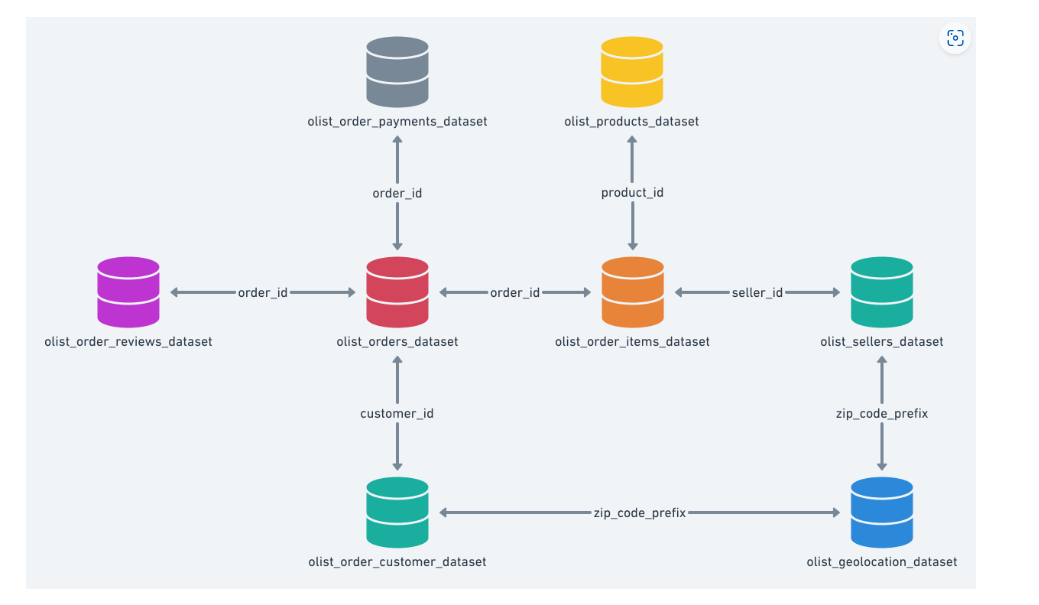

# Datasets e Merge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot') # estilo de gráfico ggplot

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Importando os dados
df_order = pd.read_csv("/content/drive/MyDrive/Programação/GRUPO DE ASSINANTES/SEMANA_2/dataset/olist_orders_dataset.csv", parse_dates=['order_purchase_timestamp'])
df_customer = pd.read_csv("/content/drive/MyDrive/Programação/GRUPO DE ASSINANTES/SEMANA_2/dataset/olist_customers_dataset.csv")
df_payments = pd.read_csv('/content/drive/MyDrive/Programação/GRUPO DE ASSINANTES/SEMANA_2/dataset/olist_order_payments_dataset.csv')

### Dataset Orders

In [3]:
# Primeiras linhas
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
# Informações
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB


- Optei por continuar apenas com as características "order_id", 'customer_id', 'order_status', 'order_purchase_timestamp'
- Não tem dados faltantes

In [5]:
# novo dataframe order
df_order = df_order[['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp']]

Descrição variáveis:

- **order_id**: identificador único por ordem
- **customer_id**: chave para dataset consumidor
- **order_status**: status da ordem
- **order_purchase_timestamp**: data da compra

### Dataset Customer

In [6]:
# Primeiras linhas
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
# informações
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


- Optei em elimar a característica 'customer_zip_code_prefix'
- Não tem dados faltantes

In [8]:
# novo dataframe customer
df_customer.drop('customer_zip_code_prefix', axis=1, inplace=True)

Descrição variáveis:

- **customer_id**: chave para dataset de ordem.
- **customer_unique_id**: identificador dos consumidores. Cada ordem tem apenas uma chave de consumidor.
- **customer_city**: cidade do consumidor
- **customer_state**: estado do consumidor

### Dataset Payments

In [9]:
# Primeiras linhas
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [10]:
# Informações
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


- Optei por deixar todas as características
- Não tem dados faltantes

Descrição Variáveis:

- **order_id**: identificador único para ordem
- **payment_sequential**: pagamento da ordem de uma ou mais maneiras
- **payment_type**: método de pagamento
- **payment_installments**: quantidade de parcelas
- **payment_value**: valor do pagamento

### Merge datasets

In [11]:
# Merge df_order com df_customer
df_1 = pd.merge(df_order, df_customer, on='customer_id')

# Merge df_payments com df_1
df_inicial = pd.merge(df_payments, df_1, on='order_id')



# Análise Exploratória

## Análise de cada variável individualmente

### payment_sequential

- Variável Quantitativa Discreta

In [12]:
# Valores únicos
df_inicial['payment_sequential'].unique()

array([ 1,  2,  4,  3,  5,  6,  8,  7, 11, 12,  9, 10, 13, 14, 17, 16, 15,
       18, 19, 21, 20, 26, 25, 24, 22, 23, 27, 29, 28])

In [13]:
# Frequência de valores
df_inicial['payment_sequential'].value_counts()

1     99360
2      3039
3       581
4       278
5       170
6       118
7        82
8        54
9        43
10       34
11       29
12       21
13       13
14       10
15        8
18        6
19        6
17        6
16        6
21        4
20        4
22        3
26        2
25        2
24        2
23        2
27        1
29        1
28        1
Name: payment_sequential, dtype: int64

In [14]:
# Query de compras parceladas por 22 vezes ou mais
df_inicial.query('payment_sequential > 22')[['payment_type', 'payment_value']]

,payment_type,payment_value
5038,voucher,23.10
5040,voucher,1.53
5046,voucher,2.79
5048,voucher,1.03
5687,voucher,66.02
5693,voucher,3.68
5698,voucher,19.26
5699,voucher,29.05
5708,voucher,28.27
5712,voucher,18.86


- Tipo de pagamento por voucher em todos
- Valores baixos

Vale a pena?

### payment_type

- Variável Qualitativa Nominais

In [15]:
# Valores únicos
df_inicial['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

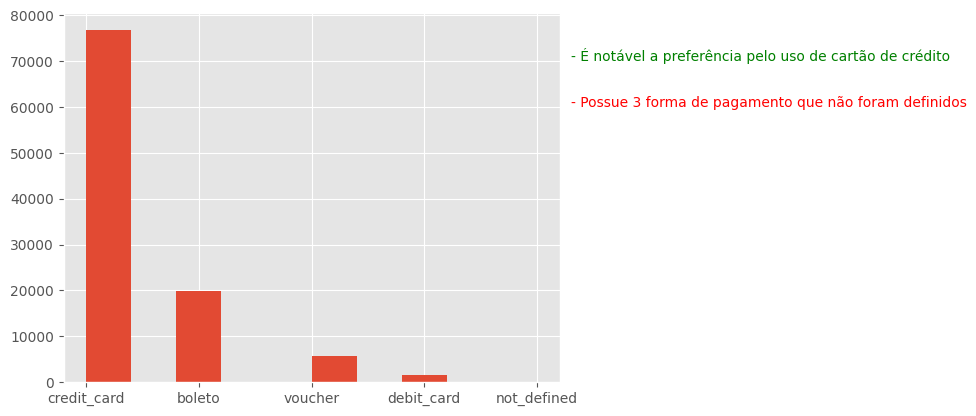

In [16]:
# Histograma payment_type
_ = plt.hist(df_inicial['payment_type'], align='mid')
_ = plt.text(4.3, 70000, '- É notável a preferência pelo uso de cartão de crédito', c='green')
_ = plt.text(4.3, 60000, '- Possue 3 forma de pagamento que não foram definidos', c='red')

In [17]:
# Instâncias com valores de payment_type = not_defined
df_inicial.loc[df_inicial['payment_type'] == 'not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state
53666,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0,a73c1f73f5772cf801434bf984b0b1a7,canceled,2018-09-03 14:14:25,968fac81e2c44fb6c1e3ac2a45e6a102,sao paulo,SP
59672,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,4fa4365000c7090fcb8cad5713c6d3db,sao paulo,SP
95043,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0,197a2a6a77da93f678ea0d379f21da0a,canceled,2018-08-28 20:05:14,6ba987d564bad1f9da8e14b9d3b71c8f,sao paulo,SP


### payment_installments

- Variável Quantitativa Discretas

In [18]:
# Valores únicos
df_inicial['payment_installments'].unique()

array([ 8,  1,  2,  3,  6,  5,  4, 10,  7, 12,  9, 13, 15, 24, 11, 18, 14,
       20, 21, 17, 22,  0, 16, 23])

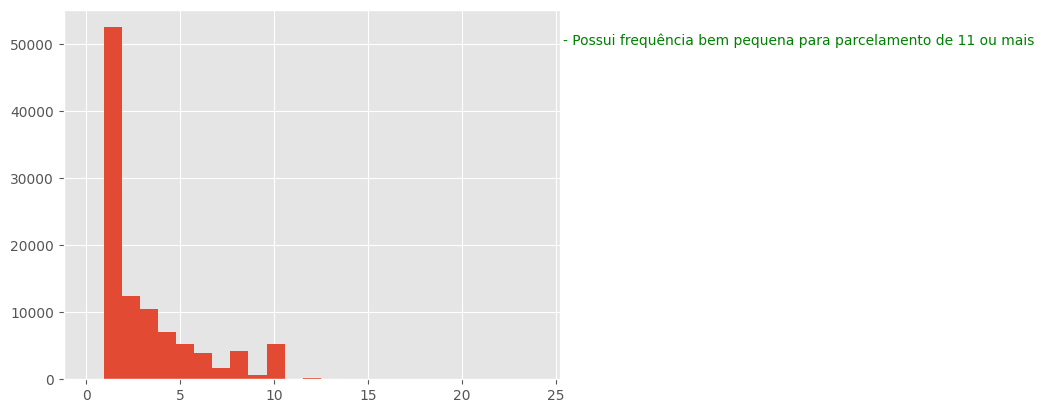

In [19]:
# Histograma payment_installments
_ = plt.hist(df_inicial['payment_installments'], align='mid', bins=25)
_ = plt.text(25.4, 50000, '- Possui frequência bem pequena para parcelamento de 11 ou mais ', c='green')

### payment_value

- Variável Quantitativa Contínua

In [20]:
# Existe valores de venda igual a 0
df_inicial.loc[df_inicial['payment_value'] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state
5697,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0,9af2372a1e49340278e7c1ef8d749f34,shipped,2017-04-20 12:45:34,8af7ac63b2efbcbd88e5b11505e8098a,cuiaba,MT
5706,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0,9af2372a1e49340278e7c1ef8d749f34,shipped,2017-04-20 12:45:34,8af7ac63b2efbcbd88e5b11505e8098a,cuiaba,MT
6022,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0,f2def7f64f36952f2f5a9791f0285f34,delivered,2018-01-24 23:24:14,cc5aa1b8337e394da54980226bb0f6d4,rio de janeiro,RJ
13261,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0,8eab8f9b3c744b76b65f7a2c0c8f2d6c,delivered,2017-06-08 21:18:45,e4000306cf2f63714e6bb70dd20a6592,goiania,GO
43037,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0,843b211abe7b0264dd4a69eafc5bdf43,delivered,2017-10-26 23:51:35,677ad9cdca6c47c733f0cc6e23d7bb4c,petropolis,RJ
47360,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0,648121b599d98c420ef93f6135f8c80c,delivered,2017-05-27 19:20:24,9077449283dc1319d5e51fb3159b28e2,anchieta,ES
53666,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0,a73c1f73f5772cf801434bf984b0b1a7,canceled,2018-09-03 14:14:25,968fac81e2c44fb6c1e3ac2a45e6a102,sao paulo,SP
59672,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,4fa4365000c7090fcb8cad5713c6d3db,sao paulo,SP
95043,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0,197a2a6a77da93f678ea0d379f21da0a,canceled,2018-08-28 20:05:14,6ba987d564bad1f9da8e14b9d3b71c8f,sao paulo,SP


- Valores "not_defined" possuem valores de compra de 0 e foram cancelados

In [21]:
# Valor máximo de compra
df_inicial['payment_value'].max()

13664.08

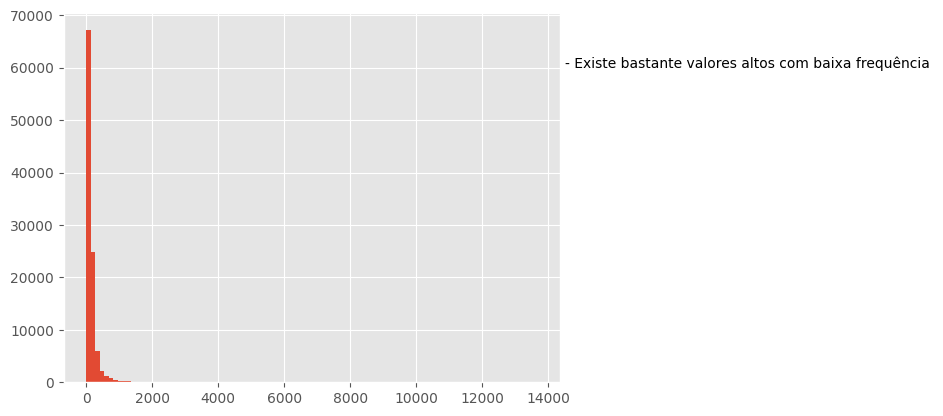

In [22]:
# Histograma
_ = plt.hist(df_inicial['payment_value'], align='mid', bins=100)
_ = plt.text(14500.4, 60000, '- Existe bastante valores altos com baixa frequência ')

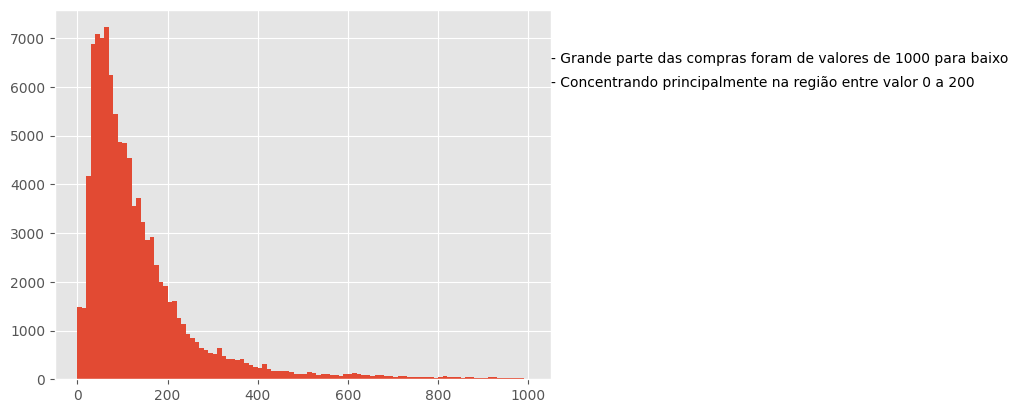

In [23]:
# Histograma aproximado
_ = plt.hist(df_inicial['payment_value'].where(df_inicial['payment_value'] < 1000), align='mid', bins=100)
_ = plt.text(1050.4, 6500, '- Grande parte das compras foram de valores de 1000 para baixo')
_ = plt.text(1050.4, 6000, '- Concentrando principalmente na região entre valor 0 a 200')

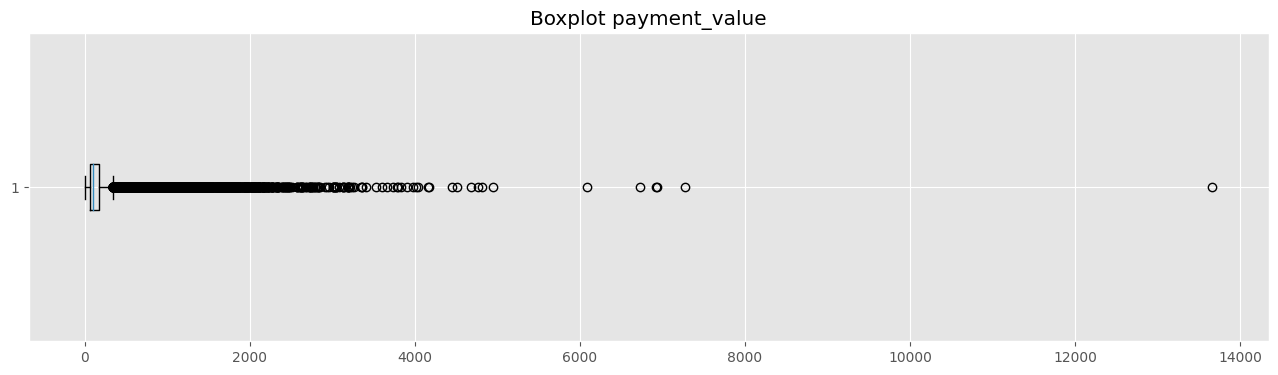

In [24]:
# Boxplot
_ = plt.figure(figsize=(16,4))
_ = plt.boxplot(df_inicial['payment_value'], vert=False)
_ = plt.title('Boxplot payment_value')

### order_status

- Variável Qualitativa Nominal

In [25]:
# Valores únicos
df_inicial['order_status'].unique()

array(['delivered', 'canceled', 'invoiced', 'shipped', 'processing',
       'unavailable', 'approved', 'created'], dtype=object)

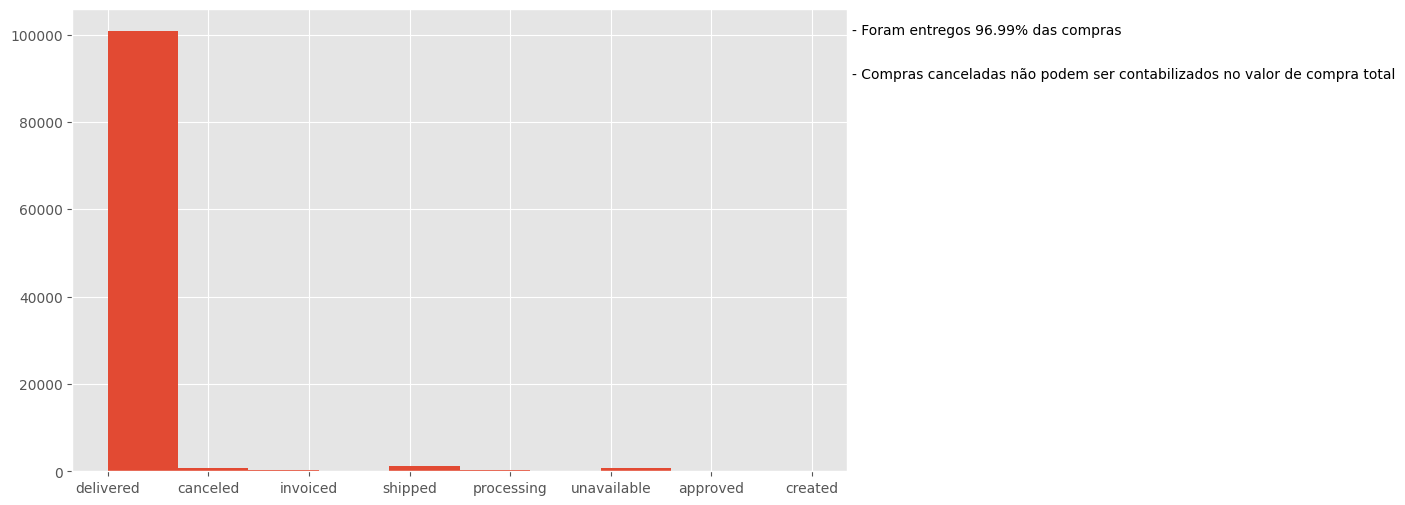

In [26]:
# Porcentagem compras por delivered
delivered_porc = round((df_inicial['order_status'].where(df_inicial['order_status'] == 'delivered').count()/df_inicial['order_status'].count())*100, 2)

# Histograma
_ = plt.figure(figsize=(10,6))
_ = plt.hist(df_inicial['order_status'], align='mid')
_ = plt.text(7.4, 100000, f'- Foram entregos {delivered_porc}% das compras')
_ = plt.text(7.4, 90000, '- Compras canceladas não podem ser contabilizados no valor de compra total')

In [27]:
# Frequência dos valores
df_inicial['order_status'].value_counts()

delivered      100756
shipped          1166
canceled          664
unavailable       649
invoiced          325
processing        319
created             5
approved            2
Name: order_status, dtype: int64

In [28]:
# Compras criadas
df_inicial.query('order_status == "created"')

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state
28606,35de4050331c6c644cddc86f4f2d0d64,1,credit_card,7,105.87,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,10d5890ed5e7ec78a7db23b5ac579b17,sao leopoldo,RS
44387,b5359909123fa03c50bdb0cfed07f098,1,credit_card,10,160.94,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,55fbb57fd54c35a38c80c2a032a6ca6e,general salgado,SP
51964,7a4df5d8cff4090e541401a20a22bb80,1,boleto,1,37.84,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,355862aa14375fe3950ee04fef9c7a53,rio de janeiro,RJ
70213,90ab3e7d52544ec7bc3363c82689965f,1,credit_card,6,245.85,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,161e5b2b4513edb336986a8909218365,paranavai,PR
95754,dba5062fbda3af4fb6c33b1e040ca38f,1,boleto,1,137.60,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,2e015e68fbfa36910263df5384e8e45c,brasilia,DF


In [29]:
# Compras aprovadas
df_inicial.query('order_status == "approved"')

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state
837,132f1e724165a07f6362532bfb97486e,1,credit_card,5,179.46,b2191912d8ad6eac2e4dc3b6e1459515,approved,2017-04-25 01:25:34,6a068ccd3a149b5c8ceb4e04c83feb8a,sao paulo,SP
22851,a2e4c44360b4a57bdff22f3a4630c173,1,credit_card,1,61.62,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,7b9d52d22310baecad0f9df64872208d,lagoa da prata,MG


In [30]:
# 5 compras canceladas
df_inicial.query('order_status == "canceled"').head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state
29,5d9c5817e278892b7498d90bfa28ade8,1,credit_card,2,290.16,b583a7efe4522c8ce8942bd47f33d487,canceled,2018-04-26 08:13:54,67a7e94ec59ef6d6ba83942c81d39b9a,sao paulo,SP
70,947e9c6bfd83a06953c420ef92d3da6e,1,voucher,1,69.46,2737211835d5ea370af15ee145f7840c,canceled,2018-08-15 15:13:32,a2ac4c64994786e12db70e1782d2bfef,sao paulo,SP
265,f86d7bc39aab05299691322044b63bb2,1,voucher,1,1302.42,ff31bee1ba4bba00cc14b1b91c8d28f3,canceled,2018-08-13 18:43:06,a0931a30dcf7e2106f0939b799c54321,porto velho,RO
290,90eaac01afdf4e531a70ad869e092c75,1,credit_card,1,234.43,9989fec0cc8309e9afcb1da811943f3a,canceled,2018-06-05 15:15:24,cd71c345cffd7d0edcfa17034446350b,porto velho,RO
496,61792c6272346d7f4b7c5b1747df7b1a,1,credit_card,4,49.34,6d6221343635319264386c8f977b01de,canceled,2017-03-08 11:51:41,75bf2fd30af0de267a66a0e6be8c1213,sao luis,MA


### customer unique_id

- Variável Qualitativa Nominal

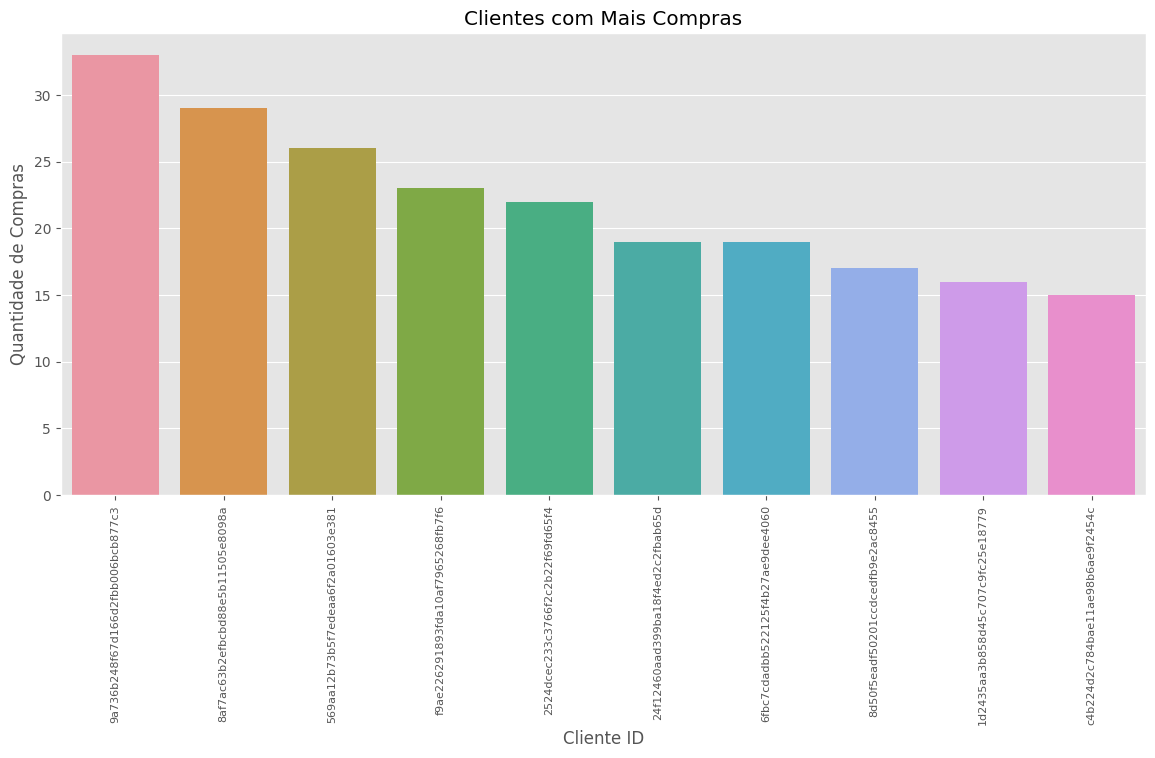

In [31]:
# Dataframe para gráfico
customer_count = df_inicial['customer_unique_id'].value_counts().to_frame().reset_index()

# Histograma
_ = plt.figure(figsize=(14,6))
_ = sns.barplot(data=customer_count[:10], x='index', y='customer_unique_id')
_ = plt.title('Clientes com Mais Compras')
_ = plt.xlabel('Cliente ID')
_ = plt.ylabel('Quantidade de Compras')
_ = plt.xticks(rotation=90, fontsize=8)

### customer_city

- Variável Qualitativa Nominal

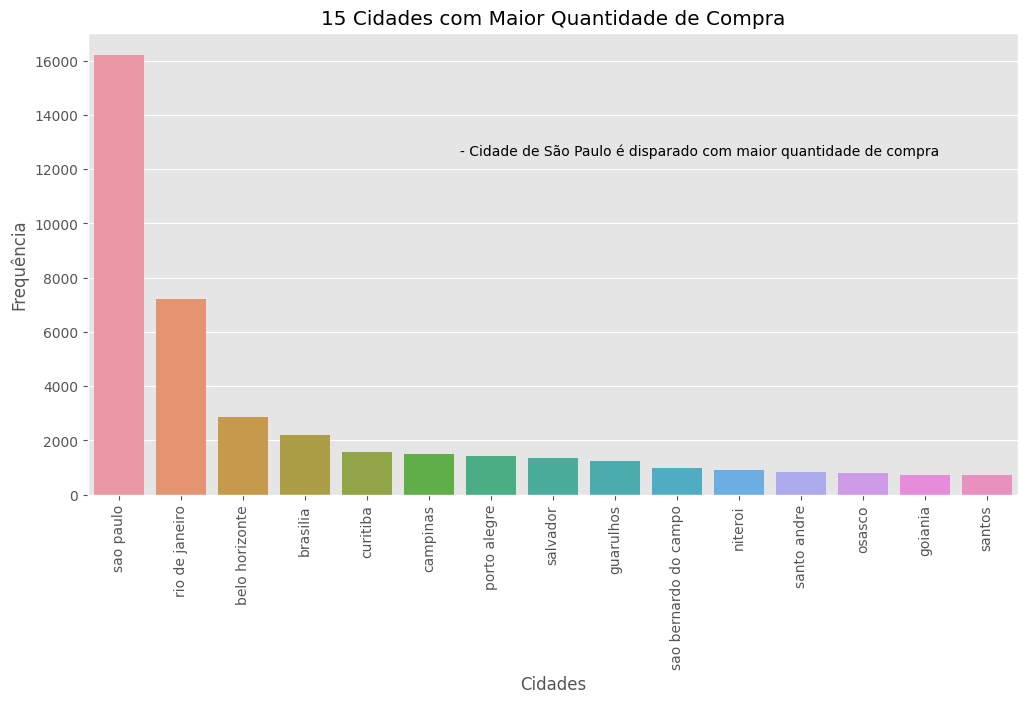

In [32]:
# Dataframe para gráfico
cidade_compras = df_inicial['customer_city'].value_counts().to_frame().reset_index()

# Histograma
_ = plt.figure(figsize=(12,6))
_ = sns.barplot( data=cidade_compras[:15],
                 x='index',
                 y='customer_city')
_ = plt.xticks(rotation=90)
_ = plt.title("15 Cidades com Maior Quantidade de Compra")
_ = plt.text(5.5, 12500, '- Cidade de São Paulo é disparado com maior quantidade de compra')
_ = plt.xlabel('Cidades')
_ = plt.ylabel('Frequência')

### customer_state

- Variável Qualitativa Nominal

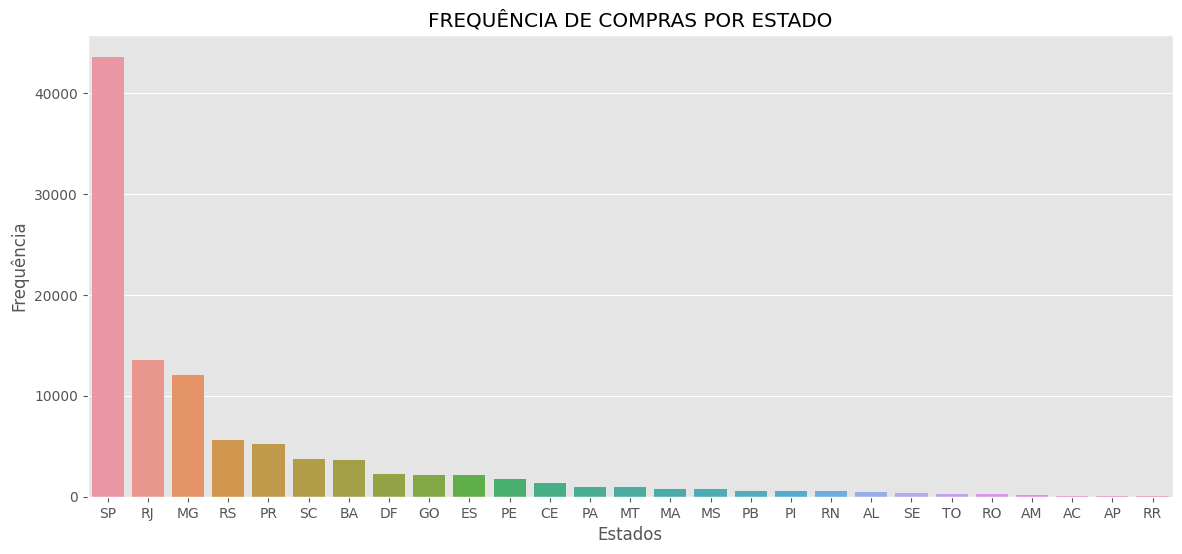

In [33]:
# Dataframe para gráfico
estado_compras = df_inicial['customer_state'].value_counts().to_frame().reset_index()

# Histograma
_ = plt.figure(figsize=(14,6))
_ = sns.barplot(data=estado_compras, x='index', y='customer_state')
_ = plt.title('FREQUÊNCIA DE COMPRAS POR ESTADO')
_ = plt.xlabel('Estados')
_ = plt.ylabel('Frequência')

## Análise Explorátoria Geral

In [34]:
df_inicial.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,customer_unique_id,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,708ab75d2a007f0564aedd11139c7708,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,a8b9d3a27068454b1c98cc67d4e31e6f,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,6f70c0b2f7552832ba46eb57b1c5651e,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,87695ed086ebd36f20404c82d20fca87,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,4291db0da71914754618cd789aebcd56,conchas,SP


In [35]:
# Informações
df_inicial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103886 entries, 0 to 103885
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  103886 non-null  object        
 1   payment_sequential        103886 non-null  int64         
 2   payment_type              103886 non-null  object        
 3   payment_installments      103886 non-null  int64         
 4   payment_value             103886 non-null  float64       
 5   customer_id               103886 non-null  object        
 6   order_status              103886 non-null  object        
 7   order_purchase_timestamp  103886 non-null  datetime64[ns]
 8   customer_unique_id        103886 non-null  object        
 9   customer_city             103886 non-null  object        
 10  customer_state            103886 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usag

In [36]:
print(f"Quantidade de linhas duplicadas: {df_inicial.duplicated().sum()}\n")
print(f"Quantidade de valores missing: {df_inicial.isna().sum().sum()}")

Quantidade de linhas duplicadas: 0

Quantidade de valores missing: 0


In [37]:
# Quantidade de valores diferentes por característica
df_inicial.nunique()

order_id                    99440
payment_sequential             29
payment_type                    5
payment_installments           24
payment_value               29077
customer_id                 99440
order_status                    8
order_purchase_timestamp    98874
customer_unique_id          96095
customer_city                4119
customer_state                 27
dtype: int64

In [38]:
# Categóricas
df_cat = df_inicial[['payment_type', 'order_status', 'customer_unique_id', 'customer_city', 'customer_state']]

# Numerica
df_num = df_inicial[['payment_sequential', 'payment_installments', 'payment_value']]

In [ ]:
# Matrix de correlação
sns.heatmap(df_num.corr(), annot=True)
plt.title('Matrix de Correlação');

### Respondendo Perguntas

Afim de conhecer mais sobre os dados, criei algumas perguntas para explorar melhor o dataset:

- Analise dos clientes com pedidos cancelados
- Informações sobre os clientes:
  - Quem fez a maior compra?
  - Quem gastou mais dinheiro?
  - Tem algum estado ou cidade que tem clientes que se destacam?
- Medidas de tendência central de tipos de pagamento por valores de compra
- 7 ou mais parcelamentos valem a pena? Valores são altos?


In [ ]:
# Dataframe somente com os pedidos cancelados
df_canceled = df_inicial.query('order_status == "canceled"')

# Dataframe sem os pedidos cancelados
df_analise = df_inicial.drop(df_inicial.query('order_status == "canceled"').index, axis=0)

#### Análise pedidos cancelados

In [ ]:
# 5 últimas instâncias
df_canceled.tail()

In [ ]:
print(f"A relação de valor cancelado por valor gerado total é de {round((df_canceled['payment_value'].sum() / df_analise['payment_value'].sum())*100, 4)}%")

In [ ]:
# Dataframe para gráfico
canceled_top = df_canceled.groupby('customer_unique_id')['payment_value'].sum().sort_values(ascending=False)[:20].to_frame().reset_index()

# Valor total cancelado pelo primeiro cliente
top1_valor = canceled_top['payment_value'].max()

# Histograma
_ = plt.figure(figsize=(14,6))
_ = sns.barplot(data=canceled_top, x='customer_unique_id', y='payment_value', palette='dark:#5A9_r')
_ = plt.title('Valor por Cliente Compra Cancelada')
_ = plt.xlabel('ID Cliente')
_ = plt.ylabel('Valor Cancelado')
_ = plt.xticks(rotation=90)
_ = plt.text(5, 5500, f'- Cliente com maior valor de compra cancelada foi de R${top1_valor}', c='red')

Abaixo temos as duas compras canceladas pelo cliente "46450c74a0d8c5ca9395da1daac6c120", onde se nota a tentativa de compra do mesmo valor de R$3184,34 através método de pagamento voucher em dias diferentes.

In [ ]:
# Compras canceladas
df_canceled.query('customer_unique_id == "46450c74a0d8c5ca9395da1daac6c120"')[['customer_unique_id', 'payment_type', 'payment_value', 'order_purchase_timestamp', 'order_status']]

Porém ele já tinha realizado mesmo valor de compra no mês anterior optando pelo método de pagamento crédito.

In [ ]:
# Compras realizadas
df_analise.query('customer_unique_id == "46450c74a0d8c5ca9395da1daac6c120"')[['customer_unique_id', 'payment_type', 'payment_value', 'order_purchase_timestamp', 'order_status']]

#### Informações Clientes

In [ ]:
# 5 maiores compras e dropei duas colunas apenas para facilitar visualização
df_analise.loc[df_analise['payment_value'].sort_values(ascending=False)[:5].index].drop(['customer_id', 'order_id'], axis=1)

In [ ]:
# Top15 clientes
top15_cliente = df_analise.groupby('customer_unique_id')['payment_value'].sum().sort_values(ascending=False)[:15].to_frame().reset_index()

# Gráfico de barras
plt.figure(figsize=(14,7))
sns.barplot(data=top15_cliente, x='customer_unique_id', y='payment_value', palette='Greens_r')
plt.xticks(rotation=90)
plt.xlabel('Cliente ID')
plt.ylabel('Valor de Compra Total')
plt.title('Valor de Compra Total por Cliente');

In [ ]:
# Compras do consumidor específico
df_analise.query('customer_unique_id == "0a0a92112bd4c708ca5fde585afaa872"')

O cliente "0a0a92112bd4c708ca5fde585afaa872" fez apenas uma compra e foi o cliente com maior gasto no dados analisados.

Estado e Cidades

In [ ]:
# Dataframe estados
estados = df_analise.groupby('customer_state')['payment_value'].sum().sort_values(ascending=False).to_frame().reset_index()

# Gráfico de barras
_ = plt.figure(figsize=(14,6))
_ = sns.barplot(data=estados, x='customer_state', y='payment_value', palette='dark:#5A9_r')
_ = plt.title('Valor de Compra Total por Estado')
_ = plt.xlabel('Estado')
_ = plt.ylabel('Valor de Compra Total')
_ = plt.ticklabel_format(axis='y', style='plain')

In [ ]:
# Dataframe estados
estados = df_analise.groupby('customer_city')['payment_value'].sum().sort_values(ascending=False).to_frame().reset_index()

# Gráfico de barras
_ = plt.figure(figsize=(14,6))
_ = sns.barplot(data=estados[:20], x='customer_city', y='payment_value', palette='dark:#5A9_r')
_ = plt.title('Valor de Compra Total por Cidade')
_ = plt.xlabel('Cidade')
_ = plt.ylabel('Valor de Compra Total')
_ = plt.xticks(rotation=90)
_ = plt.ticklabel_format(axis='y', style='plain')

Os estados de SP, RJ e MG tem uma nítida diferença de valor para outros estados. As capitais Rio de Janeiro e Belo Horizonte tem uma diferença considerável, o que faz pensar que as cidades do interior de BH "ajuda" o estado alcançar o valor do estado de RJ.

In [ ]:
# Descrição
df_analise.groupby(['customer_state'])['payment_value'].describe().loc[['MG', 'RJ']]

In [ ]:
# Boxplot
df_analise.loc[(df_analise['customer_state'] == 'RJ') | (df_analise['customer_state'] == 'MG')].groupby(['customer_state']).boxplot(column='payment_value',
                                                                                                                                    subplots=False,
                                                                                                                                    figsize=(14,4),
                                                                                                                                    vert=False)
plt.title('Boxplot Estados MG e RJ por Valor de Compra');

Olhando o boxplot e medidas centrais acima é notável que a média e mediana estão localizados em valores "baixos" e possui muitos valores outliers.

#### Tipos de pagamento por valores de compra

In [ ]:
# Groupby
df_analise.groupby('payment_type')['payment_value'].describe().sort_values(by='count', ascending=False)

In [ ]:
# Boxplot
df_analise.groupby('payment_type').boxplot(column='payment_value', subplots=False, figsize=(12,10))
plt.title('Boxplot Tipo de Pagamento por Valor de Compra');

Olhando o boxplot e a descrição acima é notável que os valores de medidas centrais e dispersão do boleto, crédito e debito são bem próximos, porém, no voucher os números são bem abaixos. Isso indica que pagamentos por voucher são para valores baixos.

#### 7 ou mais parcelamentos

In [ ]:
# Função de percentile 50
def per50(x):
    return x.quantile(0.5)

# Função de percentile 95
def per95(x):
    return x.quantile(0.95)

# Groupby
df_analise.loc[df_analise['payment_installments'] >= 7].groupby('payment_installments')['payment_value'].agg(['count', 'mean', 'std', 'min', per50, per95, 'max'])

Olhando as medidas de cima é notável a preferencia por certos números de parcelas, como 7, 8, 9, 10, 12, 15, 18, 20 e 24 e nesses números possui valores de compra máxima alta. Isso pode ter acontencido por serem valores mais comerciais ou com mais marketing em cima.

# Classificação Clientes

In [ ]:
df_analise.head()

In [ ]:
# Dataframe
df_cliente = df_analise[['payment_type', 'payment_value']]
df_cliente.head()

In [ ]:
# Transformando variável categórica
df_cliente = pd.get_dummies(df_cliente, drop_first=True)

# Escalonando
scaler = StandardScaler()

df_scaler = scaler.fit_transform(df_cliente)

# PCA
pca = PCA(2)

df_scaler = pca.fit_transform(df_scaler)

link para função de hopkins abaixo: https://datascience.stackexchange.com/questions/14142/cluster-tendency-using-hopkins-statistic-implementation-in-python#:~:text=Cluster%20tendency%20using%20Hopkins%20statistic%20implementation%20in%20Python,-Ask%20Question&text=The%20Hopkins%20statistic%2C%20is%20a,the%20data%20is%20regularly%20spaced.

In [ ]:
from sklearn.neighbors import NearestNeighbors

def hopkins(X, portion=0.1, seed=247):
  # X: numpy array of shape (n_samples, n_features)
  n = X.shape[0]
  d = X.shape[1]
  m = int(portion * n)

  np.random.seed(seed)
  nbrs = NearestNeighbors(n_neighbors=1).fit(X)
  # u_dist
  rand_X = np.random.uniform(X.min(axis=0), X.max(axis=0), size=(m,d))
  u_dist = nbrs.kneighbors(rand_X, return_distance=True)[0]
  # w_dist
  idx = np.random.choice(n, size=m, replace=False)
  w_dist = nbrs.kneighbors(X[idx,:], 2, return_distance=True)[0][:,1]

  U = (u_dist**d).sum()
  W = (w_dist**d).sum()
  H = U / (U + W)
  return H

In [ ]:
# Valor de hopkins
hopkins(df_scaler)

Valor de hopkins = 1, aproximadamente. Isso significa que o conjunto de dados é "clusterizável".

In [ ]:
# Loop para encontrar valor de inertia
inertia = []

ks = range(1,20)

for k in ks:

    kmeans_modelo = KMeans(n_clusters=k)

    kmeans_modelo.fit(df_scaler)

    inertia.append(kmeans_modelo.inertia_)

In [ ]:
# Gráfico de k por inertia
plt.plot(ks, inertia, 'o-')
plt.xlabel('Valor de k')
plt.ylabel('Inertia')
plt.title('Enertia por valor de k 1-50')
plt.show()

In [ ]:
# Modelo kmeans
kmeans_modelo_3 = KMeans(n_clusters=4)

kmeans_modelo_3.fit(df_scaler)

df_final = pd.DataFrame(data=df_scaler, columns=['var_1', 'var_2'])

df_final['classificacao'] = kmeans_modelo_3.labels_

In [ ]:
# Gráfico
plt.scatter(x=df_final['var_1'], y=df_final['var_2'], c=df_final['classificacao'])
plt.title('Modelo Kmeans')
plt.show()

In [ ]:
# Modelo dbscan
dbscan = DBSCAN(eps=1.5)

dbscan.fit(df_scaler[:30000])



In [ ]:
# Dataframe e classificação
df_final_2 = pd.DataFrame(data=df_scaler[:30000], columns=['var_1', 'var_2'])

df_final_2['classificacao'] = dbscan.labels_

In [ ]:
# Gráfico
plt.scatter(x=df_final_2['var_1'], y=df_final_2['var_2'], c=df_final_2['classificacao'])
plt.title('Modelo DBSCAN')
plt.show()

O modelo que classificou melhor os dados foi o dbscan.

In [ ]:
# Exportando em formato de excel
# df_analise.to_excel('/content/drive/MyDrive/Programação/GRUPO DE ASSINANTES/SEMANA_2/analise.xlsx', index=False)